# Proyecto 1

## _Cargar librerias_

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from matplotlib import pylab, mlab, pyplot
from pylab import *
from numpy import *
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
from IPython import display
%matplotlib inline
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from sklearn import linear_model
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## _Cargar Base de datos_

### _Base df (Resultados de encuesta Pública)_

In [211]:
df = pd.read_csv('C:/Users/Teletrabajo/Desktop/1.UDACITY/Clase 1. The Data Science Process/Practica Libre/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### _Tamaño de base de datos original_

El tamaño de la base de datos original es de 51.392 filas o registros por 154 columnas o variables

In [212]:
num_rows = df.shape[0] #number of rows
num_cols = df.shape[1] #number of columns
print('Número de filas: \n', num_rows,'\nNúmero de columnas: \n',num_cols)

Número de filas: 
 51392 
Número de columnas: 
 154


### _Estadísticos descriptivos Variables Cuantitativas Base de datos df_

A continuación encontramos que de las 145 variables, 6 son de tipo cuantitativo ya que la columna "Respondent" es una columna de identificador. Se evidencia que la variable "ExpectedSalary" contiene muy pocos datos (2.566) tan solo un 5% de las personas contestaron esa pregunta.

In [213]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


# Pregunta 1)

##  _¿Cómo se comporta la satisfacción laboral?_

Posteriormente se calculará un resumen de estadísticas descriptivas de la variable _JobSatisfaction_, donde se puede visualizar que en promedio la satisfación laboral es de 6.9 es decir que la mayoría de encuestados tienen buena satifacción laboral. También se evidencia que el percentil 1 (25%) es 6, por consiguiente el 75% de los encuentados tienen una satisfacción laboral por encima de 6 que es aceptable, como se puede ver en las siguientes tabla, grafico de barras y diagrama caja.

In [214]:
df['JobSatisfaction'].describe()

count    40376.000000
mean         6.957078
std          2.167652
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64

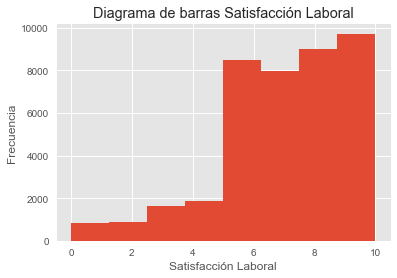

In [215]:
df['JobSatisfaction'].hist(bins=8) 
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Frecuencia")
plt.title("Diagrama de barras Satisfacción Laboral")
plt.show()

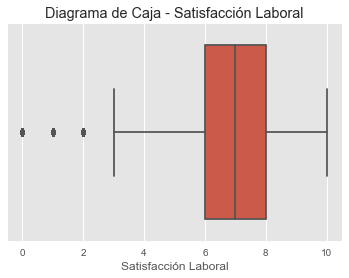

In [216]:
cajas=sns.boxplot(list(df['JobSatisfaction']))
plt.title("Diagrama de Caja - Satisfacción Laboral")
plt.xlabel("Satisfacción Laboral")
plt.show()

A continuación se realiza las siguientes tablas comparando la satisfación laboral con el estado del empleado, el tamañano de la compañia y el país. De aquí se concluyeque los empleados con menos satisfacción laboral son los que tienen contratos de tiempo completo. 

In [217]:
df2=df.groupby(['EmploymentStatus']).mean()['JobSatisfaction'].sort_values()
df2.head()

EmploymentStatus
Employed part-time                                      6.821468
Employed full-time                                      6.926805
Not employed, and not looking for work                  7.000000
Independent contractor, freelancer, or self-employed    7.252823
I prefer not to say                                          NaN
Name: JobSatisfaction, dtype: float64

También se evidencia que los empleados con mayor satisfacción laboral son los que trabajan para empresas con 10 a menos empleados, seguidas de las empresas de 10 a 19 empleados; de aquí se concluye que los de mayor satisfacción laboral son los empleados cuyas empresas cuentas con pocos empleados.

In [218]:
df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

Dadas las tablas siguientes se concluye que los paises con más baja satisfacción laboral son Saint Lucia, Fiji y American Samoa, por el contrario los paises con mayor satisfacción laboral son: Macau, Libya y Angola.

In [219]:
country_comp=df.groupby(['Country']).mean()['JobSatisfaction'].sort_values().dropna()
# como ver los valores mas grandes primero?
country_comp[:20]

Country
Saint Lucia                    0.000000
Fiji                           0.000000
American Samoa                 0.000000
Martinique (French)            1.500000
North Korea                    2.000000
Somalia                        2.000000
French Guyana                  3.000000
Niger                          3.000000
Bhutan                         3.000000
Lesotho                        3.000000
Brunei Darussalam              3.000000
U.S. Minor Outlying Islands    3.000000
Eritrea                        3.000000
Swaziland                      3.500000
Falkland Islands               4.000000
Gabon                          4.000000
Saint Vincent & Grenadines     4.500000
Algeria                        4.823529
Northern Mariana Islands       5.000000
Turkmenistan                   5.000000
Name: JobSatisfaction, dtype: float64

In [220]:
country_comp=df.groupby(['Country']).mean()['JobSatisfaction'].sort_values(ascending=False).dropna()
# como ver los valores mas grandes primero?
country_comp[:20]

Country
Macau                             10.000000
Libya                             10.000000
Angola                             9.000000
Anguilla                           9.000000
Andorra                            9.000000
Laos                               9.000000
Yemen                              9.000000
New Caledonia (French)             8.666667
Suriname                           8.500000
Virgin Islands (USA)               8.200000
Iceland                            8.090909
Malawi                             8.000000
Polynesia (French)                 8.000000
Gibraltar                          8.000000
Tadjikistan                        8.000000
Bermuda                            8.000000
S. Georgia & S. Sandwich Isls.     8.000000
Puerto Rico                        7.937500
Qatar                              7.875000
Costa Rica                         7.804878
Name: JobSatisfaction, dtype: float64

# Pregunta 2)

##  ¿_Si una persona tiene alta satisfacción por un carrera (***CareerSatisfaction***), también tendrá alta satisfacción por su trabajo (***JobSatisfaction***)?_

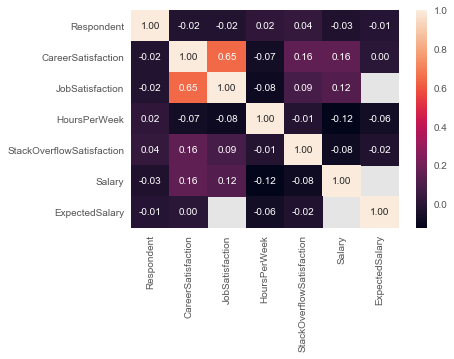

In [221]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

En el diagrama de correlación anterior se muestra que entre las variables cuantitativas la mayor relación lineal se encuentra entre las variables de _JobSatisfaction_ y _CareerSatisfaction_,, con una correlación de 0.65. Al tener esta nos indica que existe indicios que entre más Satisfacción por su carrera también tendrá mayor satisfacción por su trabajo. A continuación realizaremos un modelo lineal simple para verificar si esta variable incide y cuál es su impacto?

### Definición base de datos para la realización del modelo.

Dado que el modelo se va realizar unicamente con las variables de _JobSatisfaction_ y _CareerSatisfaction_, realizar una subbase o set a la base con estas dos variables

In [222]:
num_vars = df[['CareerSatisfaction', 'JobSatisfaction']]
num_vars.head()

,CareerSatisfaction,JobSatisfaction
0,NaN,NaN
1,NaN,NaN
2,8.0,9.0
3,6.0,3.0
4,6.0,8.0


Dado que la base de datos contiene valores en null procedemos a eliminar las filas con valores null.

In [223]:
df_dropna = num_vars.dropna(axis=0)
df_dropna_rows = df_dropna.shape[0] #number of rows
df_dropna_cols = df_dropna.shape[1] #number of columns
print('Número de filas: \n', df_dropna_rows,'\nNúmero de columnas: \n',df_dropna_cols)

Número de filas: 
 40352 
Número de columnas: 
 2


# Modelo lineal Simple

In [224]:
X = df_dropna[['CareerSatisfaction']]
y = df_dropna['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

      
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("Coeficiente de determinación R^2:", lm_model.score(X, y))
print('Independent term: \n', lm_model.intercept_)
print("Coeficiente:", list(zip(X.columns, lm_model.coef_.flatten(), )))



Coeficiente de determinación R^2: 0.41702156404404644
Independent term: 
 1.4086941268659698
Coeficiente: [('CareerSatisfaction', 0.7533886089776529)]


Después de realizar la regresión lineal simple observamos que el R2 es igual a 0.4170 lo que indica que la variable 'CareerSatisfaction' explica una parte de la variable  'JobSatisfaction', sin embargo después de probar con más variables en ejercicios alternos no logra incrementar su r2, por consiguiente se revisa los estadisticos Prob (F-statistic) y P_value de la variable 'CareerSatisfaction', para determinar si es significativa.

In [230]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 2.093e+04
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:15:58   Log-Likelihood:                -54283.
No. Observations:               28246   AIC:                         1.086e+05
Df Residuals:                   28244   BIC:                         1.086e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4087      0

Se evidencia que la probabilidad de la estadística F,  Prob(F-statistic)=0.00 es menor a 0.05% , con un nivel del 95% podemos rechazar la hipótesis nula (Ho), es decir que el modelo es explicativo, por consiguiente la variable _'CareerSatisfaction'_ del modelo tiene efecto en la variable de respuesta _'CareerSatisfaction'_ y también observamos que el p_value (P>|t|) de la variable _'CareerSatisfaction'_ es 0.000, menor a 0.05%, es decir que es significativa para el modelo.

Por lo anterior se concluye que el grado de satisfacción por una carrera influye en la satisfacción por el trabajo, sin embargo no es sufiente para explicar el la satisfacción por el trabajo, por consiguiente debe existir otras variables que también contribuyan para que la satisfacción por el trabajo sea mayor.

# Pregunta 3)

##  ¿_Qué variables cualitativas y cuantitativas influyen para que un empleado tenga una alta satisfacción por su trabajo (***JobSatisfaction***)?_

Dado que la base de datos contiene más de 140 variables cualitativas, seleccionamos las variables cualitativas que estan más relacionadas con las condiciones laboral como lo son: _'EmploymentStatus'_, _'CompanySize'_ y _'SeriousWork'_ , está selección de variables se realiza despendiendo el punto de vista de investigador.

In [187]:
num_vars2 = df[['JobSatisfaction','EmploymentStatus','CompanySize','SeriousWork']]
num_vars2.head()

,JobSatisfaction,EmploymentStatus,CompanySize,SeriousWork
0,NaN,"Not employed, and not looking for work",NaN,Strongly agree
1,NaN,Employed part-time,20 to 99 employees,NaN
2,9.0,Employed full-time,"10,000 or more employees",Agree
3,3.0,Employed full-time,"10,000 or more employees",Strongly agree
4,8.0,Employed full-time,10 to 19 employees,NaN


Dado que la base de datos contiene valores en null procedemos a eliminar las filas con valores null.

In [188]:
datos = num_vars2.dropna(axis=0)
datos.shape
print('(# filas,# Columnas)=', datos.shape)

(# filas,# Columnas)= (22498, 4)


In [189]:
datos.head()

,JobSatisfaction,EmploymentStatus,CompanySize,SeriousWork
2,9.0,Employed full-time,"10,000 or more employees",Agree
3,3.0,Employed full-time,"10,000 or more employees",Strongly agree
8,6.0,Employed full-time,"5,000 to 9,999 employees",Strongly agree
14,8.0,Employed full-time,"5,000 to 9,999 employees",Agree
17,8.0,Employed full-time,"1,000 to 4,999 employees",Agree


## Modelo lineal Múltiple

Con el objetivo de analizar variables cualitativas en el modelo de regresión lineal múltiple, es necesario convertir cada categoria de cada variable en 1 columna respectivamente, este proceso se conoce como "one-hot encoding".

In [190]:
datos2=pd.get_dummies(datos, columns=["EmploymentStatus","CompanySize","SeriousWork"]).head()

In [191]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 17
Data columns (total 20 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   JobSatisfaction                                                        5 non-null      float64
 1   EmploymentStatus_Employed full-time                                    5 non-null      uint8  
 2   EmploymentStatus_Employed part-time                                    5 non-null      uint8  
 3   EmploymentStatus_Independent contractor, freelancer, or self-employed  5 non-null      uint8  
 4   EmploymentStatus_Not employed, and not looking for work                5 non-null      uint8  
 5   CompanySize_1,000 to 4,999 employees                                   5 non-null      uint8  
 6   CompanySize_10 to 19 employees                                         5 non-null      uint8 

Después de obtener la base, introduccimos todas las variables en el modelo con el fin de determinar cuales son las más relevantes.

In [194]:
X = datos2[['EmploymentStatus_Employed full-time','EmploymentStatus_Employed part-time',
            'CompanySize_Fewer than 10 employees','CompanySize_10 to 19 employees','CompanySize_20 to 99 employees',
            'CompanySize_100 to 499 employees','CompanySize_500 to 999 employees','CompanySize_1,000 to 4,999 employees',
            'CompanySize_5,000 to 9,999 employees', 'CompanySize_10,000 or more employees',
            'SeriousWork_Agree','SeriousWork_Disagree','SeriousWork_Somewhat agree',
            'SeriousWork_Strongly agree', 'SeriousWork_Strongly disagree']]
y = datos2['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

X_train = sm.add_constant(X_train, prepend=True)
modelo2 = sm.OLS(endog=y_train, exog=X_train,)
modelo2 = modelo2.fit()
print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 Feb 2021   Prob (F-statistic):                nan
Time:                        15:34:51   Log-Likelihood:                 96.870
No. Observations:                   3   AIC:                            -187.7
Df Residuals:                       0   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Despues de realizar el modelo, encontramos que existe problemas de multicolinealidad, ya que todas las columnas las ingresamos al modelo. Por consiguiente se realizó varias interacciones seleccionando diferentes variables y el modelo presentado a continuación, es el mejor modelo que itero con un R2 igual a 89.3% y nos indica que las variable de _'EmploymentStatus'_ es significativa para modelo, es decir que el estado del empleyo influye positivamente en la satisfacción del trabajador.

In [208]:
X = datos2[['EmploymentStatus_Employed full-time','SeriousWork_Strongly agree']]
y = datos2['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

X_train = sm.add_constant(X_train, prepend=True)
modelo3 = sm.OLS(endog=y_train, exog=X_train,)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     8.333
Date:                Thu, 04 Feb 2021   Prob (F-statistic):              0.212
Time:                        15:40:41   Log-Likelihood:                -1.5692
No. Observations:                   3   AIC:                             7.138
Df Residuals:                       1   BIC:                             5.336
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Em

***Después de realizar queda la pregunta: _¿ Qué las otras variables cualitativas son significativas e influyen en la satifacción laboral de un empleado?, averigualo replicando este código con otras variables._***